![EDA Logo](edamaria.png)

In [3]:
%pip install seaborn
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\jansc\AppData\Local\Temp\ipykernel_18556\2848421944.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv('data/merged.csv', sep=';')
C:\Users\jansc\AppData\Local\Temp\ipykernel_18556\2848421944.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged.corr()


              movieId      year    Action  Adventure  Animation  Children's  \
movieId      1.000000 -0.014035 -0.042046  -0.082413  -0.014177   -0.071589   
year        -0.014035  1.000000  0.088569  -0.021753  -0.043210   -0.078663   
Action      -0.042046  0.088569  1.000000   0.374961  -0.110294   -0.141314   
Adventure   -0.082413 -0.021753  0.374961   1.000000   0.004732    0.098283   
Animation   -0.014177 -0.043210 -0.110294   0.004732   1.000000    0.576204   
Children's  -0.071589 -0.078663 -0.141314   0.098283   0.576204    1.000000   
Comedy       0.061667  0.105146 -0.268092  -0.124960   0.018544    0.058711   
Crime       -0.061896  0.053107  0.088519  -0.045924  -0.062520   -0.081977   
Documentary -0.009544  0.040907 -0.052565  -0.035109  -0.018991   -0.024901   
Drama       -0.030856  0.020568 -0.202415  -0.194570  -0.154479   -0.135707   
Fantasy     -0.018792 -0.016154  0.014551   0.227046   0.012025    0.263280   
Film-Noir   -0.019655 -0.133041 -0.080288  -0.014178

<function matplotlib.pyplot.show(close=None, block=None)>

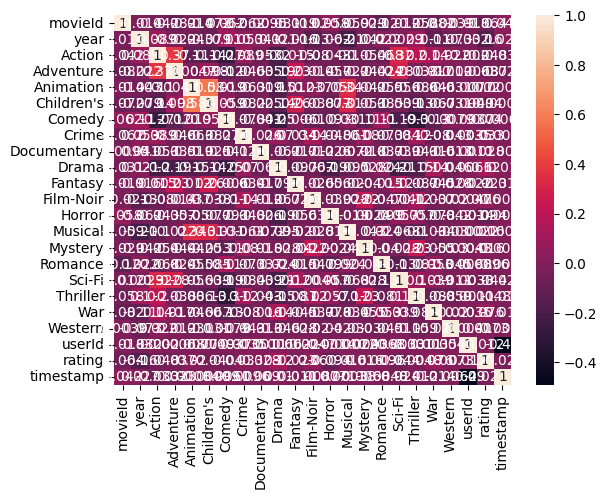

In [8]:


merged = pd.read_csv('data/merged.csv', sep=';')
movies = pd.read_csv('data/movies_meta_data.csv', sep=';', engine='python')
users = pd.read_csv('data/users.dat', sep='::', engine='python', names=['userId', 'gender', 'age', 'occupation', 'zip-code'])
ratings = pd.read_csv('data/ratings.dat', sep='::', engine='python', names=['userId', 'movieId', 'rating', 'timestamp'])

corr_matrix = merged.corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show

<Axes: >

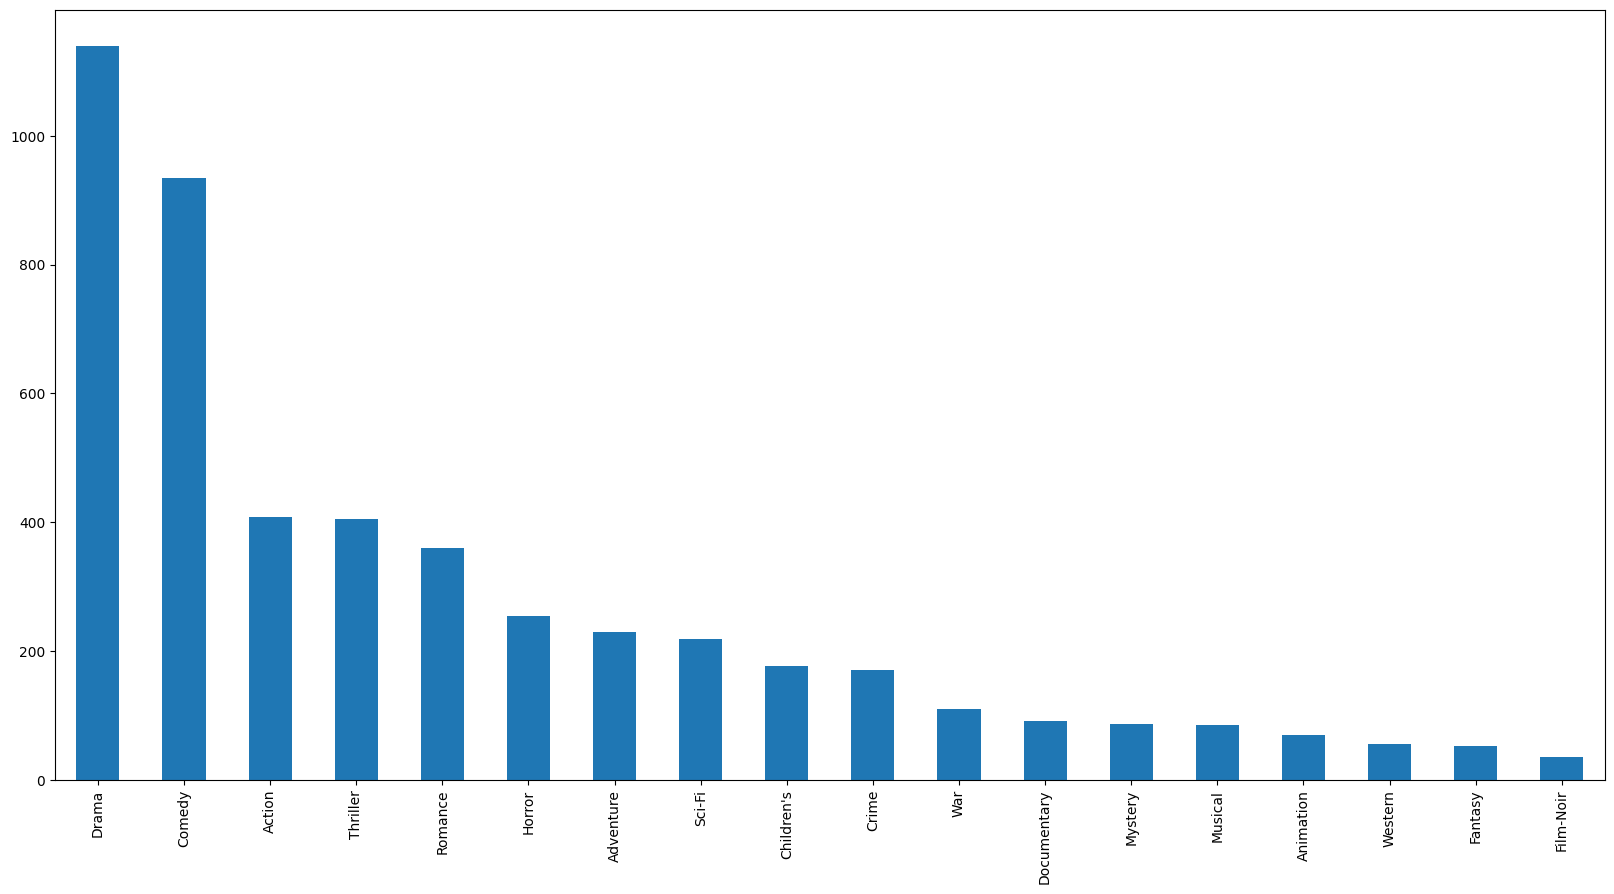

In [9]:
# Create a barchart for the number of movies for every genre
movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

<Axes: >

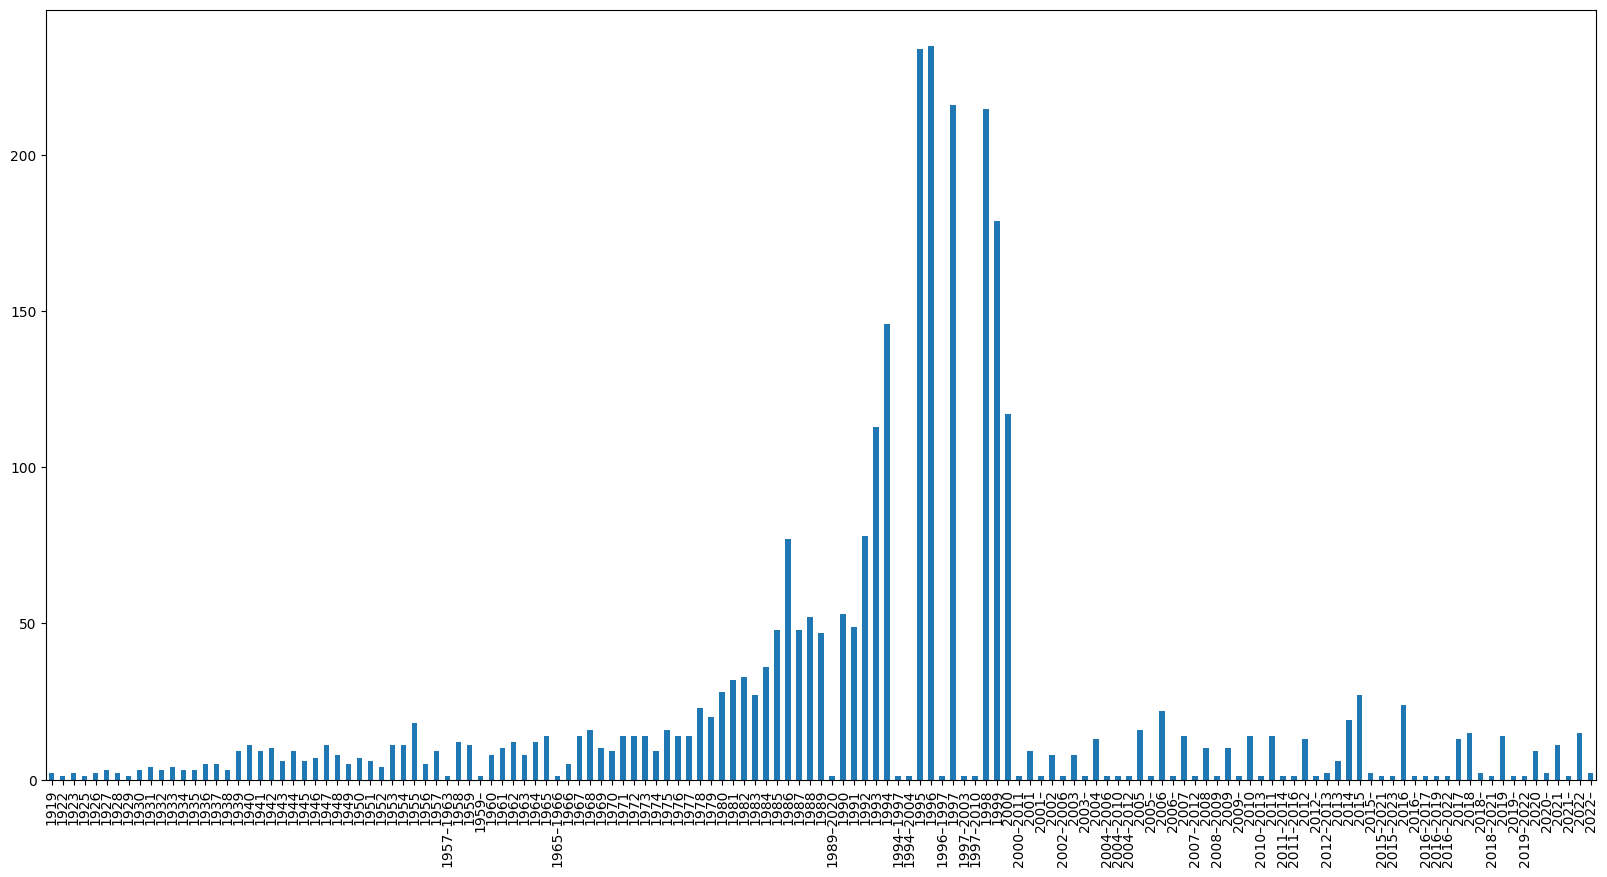

In [10]:
# Create a barchart for the number of movies for every year
movies['Year'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

<Axes: >

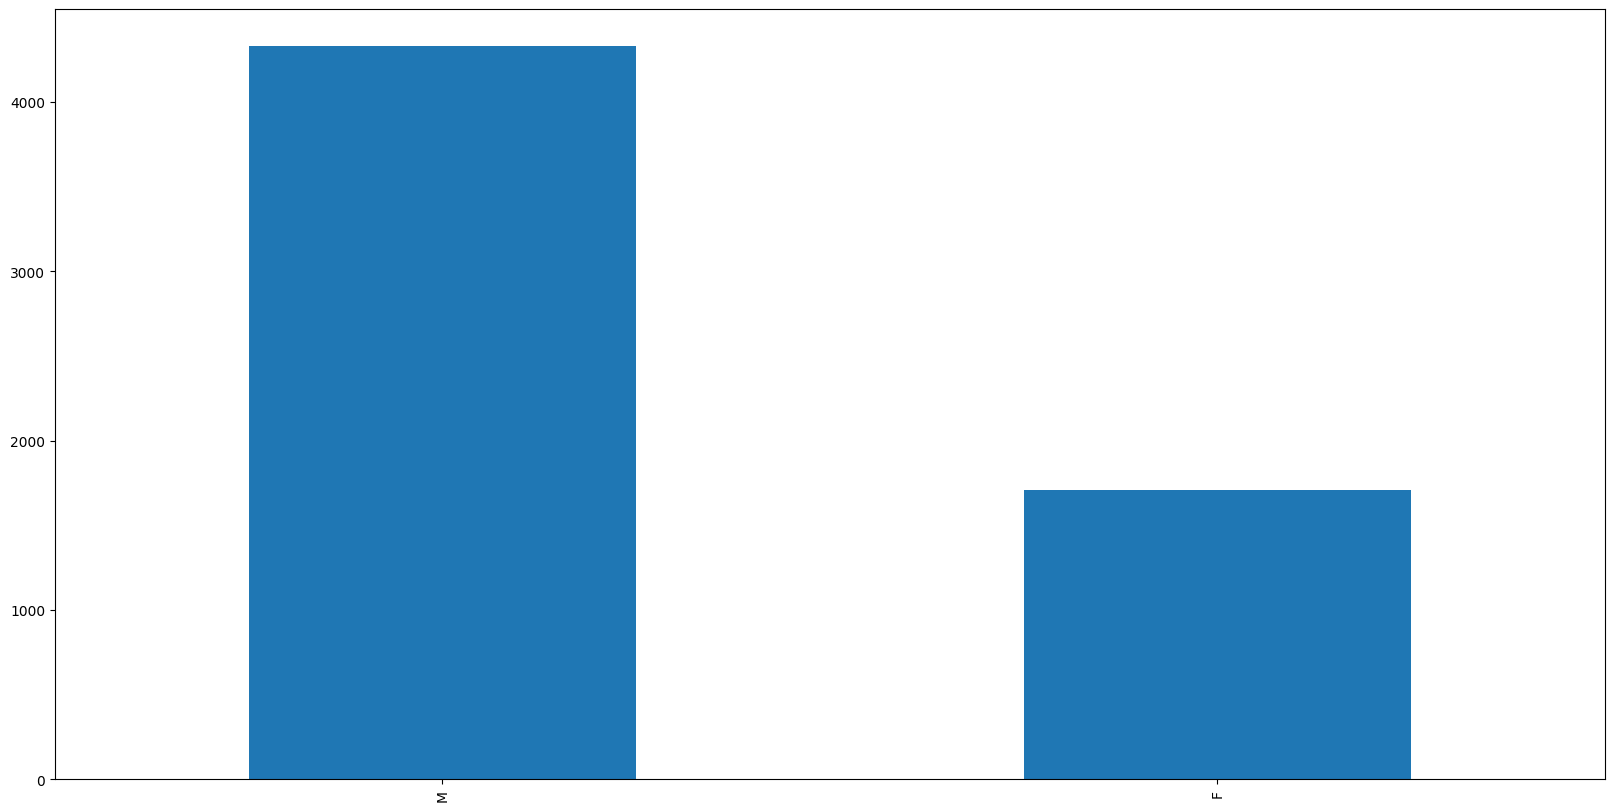

In [11]:
#create a barchart for the genders in the users dataframe
users['gender'].value_counts().plot(kind='bar', figsize=(20,10))

Text(0, 0.5, 'Count')

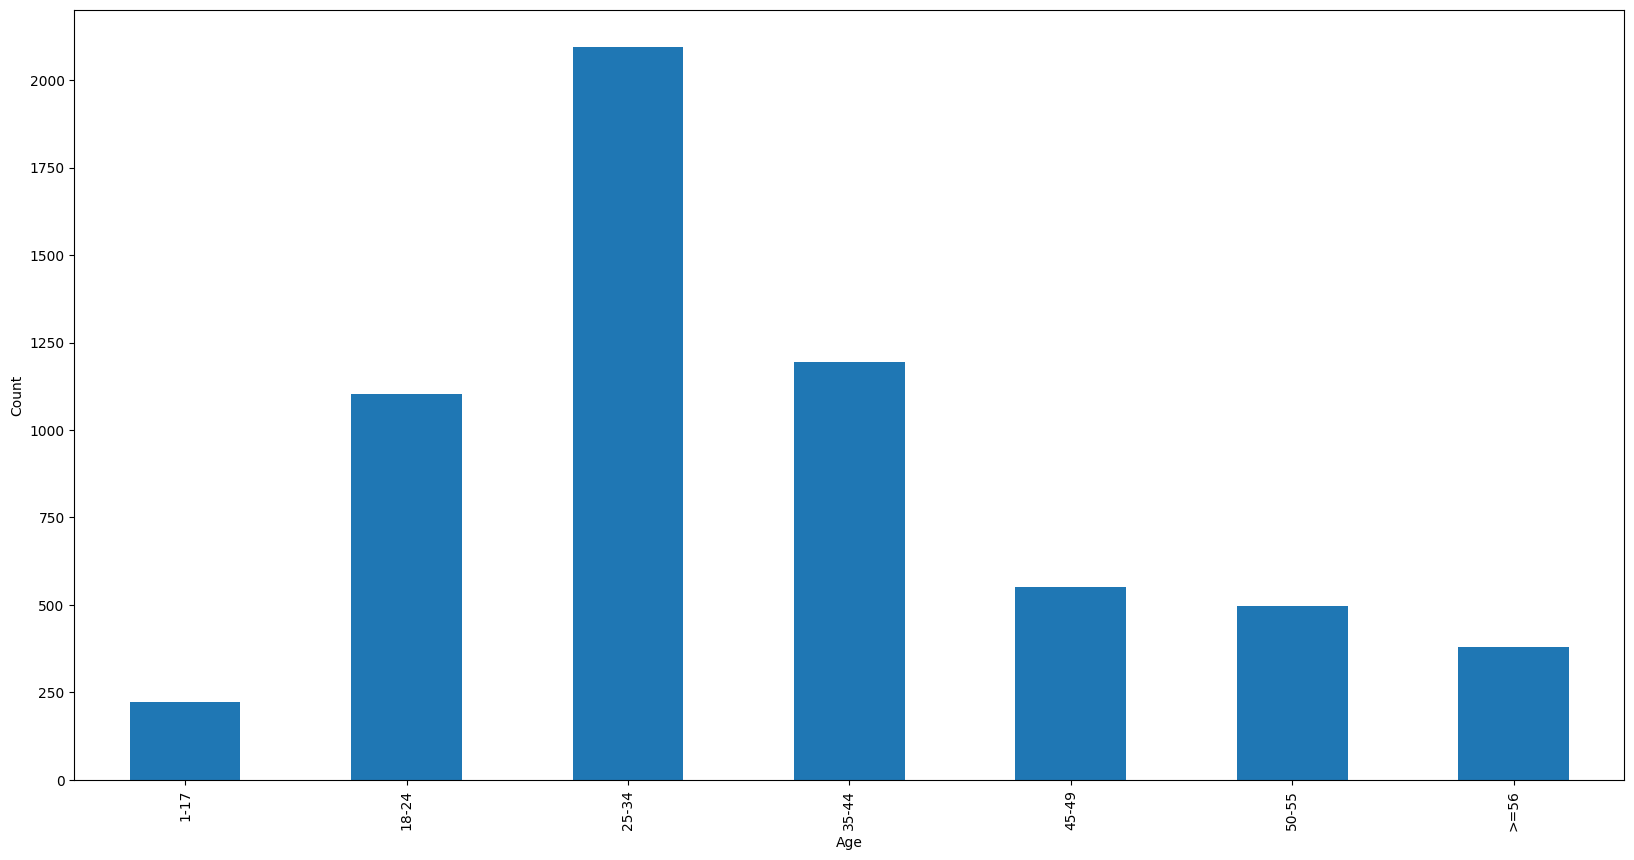

In [13]:
# Create a barchart for the ages in the users dataframe
ax = users['age'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x-axis labels to the age categories
ax.set_xticklabels(['1-17', '18-24', '25-34', '35-44', '45-49', '50-55', '>=56'])
ax.set_xlabel('Age')
ax.set_ylabel('Count')


<Axes: >

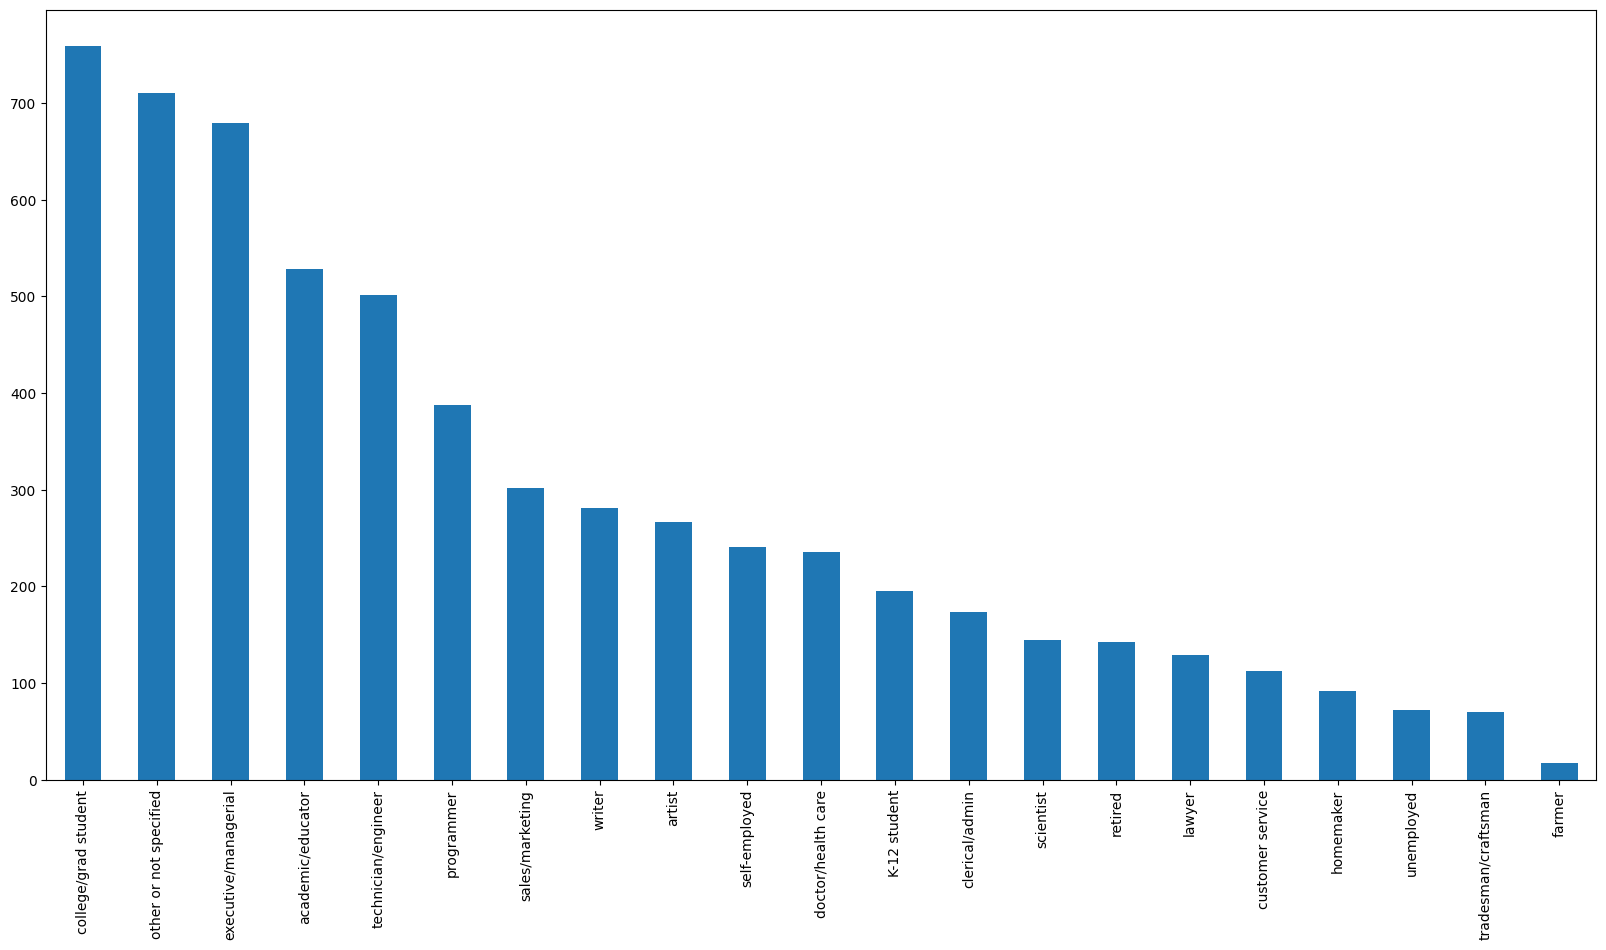

In [15]:
# Define a dictionary to map numeric occupation values to text labels
occupation_labels = {0: "other or not specified",
                     1: "academic/educator",
                     2: "artist",
                     3: "clerical/admin",
                     4: "college/grad student",
                     5: "customer service",
                     6: "doctor/health care",
                     7: "executive/managerial",
                     8: "farmer",
                     9: "homemaker",
                     10: "K-12 student",
                     11: "lawyer",
                     12: "programmer",
                     13: "retired",
                     14: "sales/marketing",
                     15: "scientist",
                     16: "self-employed",
                     17: "technician/engineer",
                     18: "tradesman/craftsman",
                     19: "unemployed",
                     20: "writer"}

# Replace the numeric occupation values with text labels using the map method
users['occupation'] = users['occupation'].map(occupation_labels)

# Plot a bar chart of the occupations in the users dataframe
users['occupation'].value_counts().plot(kind='bar', figsize=(20,10))
